In [96]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df  = pd.read_csv('/content/placement.csv')

In [98]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [99]:
df.shape

(100, 4)

In [100]:
df = df.drop( columns = ('Unnamed: 0'),axis = 1)

In [101]:
df.shape

(100, 3)

In [102]:
# Scalling The Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['cgpa','iq']] = scaler.fit_transform(df[['cgpa','iq']])

In [103]:
# creating model
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Dense(10, input_dim = 2, activation='relu'))
model.add(tensorflow.keras.layers.Dense(10, activation='relu'))
model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
model.compile(optimizer = 'Adam', loss= 'binary_crossentropy', metrics  = ['accuracy'])

In [105]:
x = df[['cgpa','iq']]
y = df['placement']

In [106]:
x

,cgpa,iq
0,0.710958,-0.014593
1,-0.079972,-0.442331
2,-0.607258,-0.064915
3,1.238245,0.211856
4,-0.167853,0.463466
...,...,...
95,-1.486069,1.922807
96,-1.398188,-2.052638
97,0.623077,1.469908
98,0.271553,-0.517814


In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 2)

In [108]:
from keras.callbacks import EarlyStopping
model.fit(x_train ,y_train , epochs = 1000 , validation_data= (x_test,y_test), callbacks=[EarlyStopping(monitor='val_loss',patience=5)])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.5102 - loss: 0.7058 - val_accuracy: 0.6000 - val_loss: 0.6876
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5320 - loss: 0.6949 - val_accuracy: 0.5500 - val_loss: 0.6812
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5445 - loss: 0.6908 - val_accuracy: 0.6000 - val_loss: 0.6750
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5391 - loss: 0.6813 - val_accuracy: 0.6500 - val_loss: 0.6690
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5891 - loss: 0.6730 - val_accuracy: 0.6500 - val_loss: 0.6631
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6102 - loss: 0.6679 - val_accuracy: 0.7500 - val_loss: 0.6574
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7539 - loss: 0.6581 - val_accuracy: 0.7500 - val_loss: 0.6517
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8070 - loss: 0.6544 - val_accuracy: 0.8000 - 

In [109]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [110]:
y_pred  = np.where(y_pred >0.5,1,0)

In [111]:
y_pred

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [112]:
accuracy_score(y_test,y_pred)*100

90.0

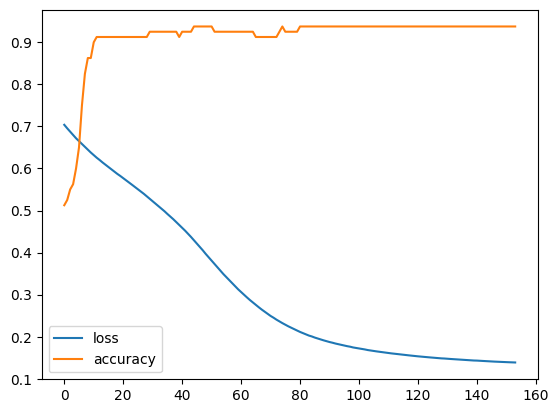

In [113]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['accuracy'])
plt.legend(['loss','accuracy'])